In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable
%matplotlib widget

import importlib
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf


In [11]:
importlib.reload(ExperimentClass)
importlib.reload(tools)
importlib.reload(mf)

<module 'math_functions' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\math_functions.py'>

In [12]:
import ast
import re

def fix_number_format(value):
    if isinstance(value, str):
        # Add a comma after an integer followed by a float
        value = re.sub(r'(\d+)\.\s+(\d)', r'\1., \2', value)
        
        # Add commas between numbers wherever necessary
        value = re.sub(r'(?<=\d)\s+(?=[\d\.])', ', ', value)
    return value

def convert_to_list(value):
    if isinstance(value, str):
        try:
            return ast.literal_eval(value)
        except Exception as e:
            print(f"Error converting value: {value}, error: {e}")
            return value
    return value

# Apply this function to the relevant columns
columns_to_convert = ['F_max', 'F_stat', 'phi_stat', 'NPQ', 'ETR']


In [13]:
PSI_folder = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI"
list_path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/00_experiments_lists/"
exp_list = pd.read_csv(list_path + "phaeo_activation_curve_list.csv", sep=";", decimal=",")
exp_list

,Name,Background,Strain,Label,Time_start,Date,Final protocol,Replicate,Cell_count_mL,Sample_vol_mL,Unnamed: 10
0,20241011_activation_Pt-2,Pt2,WT,WT,14,11/10/2024,no,0,1500000.0,2.4,NaN
1,20241014_activation_Pt2,Pt2,WT,WT,14,14/10/2024,no,0,906000.0,2.4,NaN
2,20241015_activation_KO6,Pt2,KO6,Lhcx1 KO,12,14/10/2024,no,0,1300000.0,2.4,NaN
3,20241021_activation_LtpM,Pt2,LtpM,Lhcx1 + +,11,21/10/2024,no,0,1300000.0,2.4,NaN
4,20241025_activation_Pt2_afternoon_bicarbonate,Pt2,WT,WT,16,25/10/2024,no,0,2100000.0,2.4,NaN
5,20241025_activation_Pt2_afternoon_control,Pt2,WT,WT,17,25/10/2024,no,0,2100000.0,2.4,NaN
6,20241027_activation_Pt2_morning_bicarbonate,Pt2,WT,WT,12,25/10/2024,no,0,1500000.0,2.4,NaN
7,20241027_activation_Pt2_morning_control,Pt2,WT,WT,11,25/10/2024,no,0,1500000.0,2.4,NaN
8,20241029_activation_Pt1-1,Pt1,Pt1-1,WT,10,29/10/2024,no,0,2150000.0,1.7,NaN
9,20241029_activation_Pt1-3,Pt1,Pt1-3,VDE KO,11,29/10/2024,no,0,2210000.0,1.7,NaN


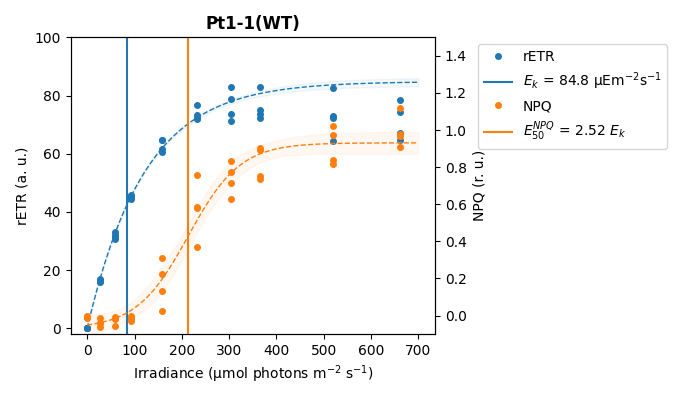

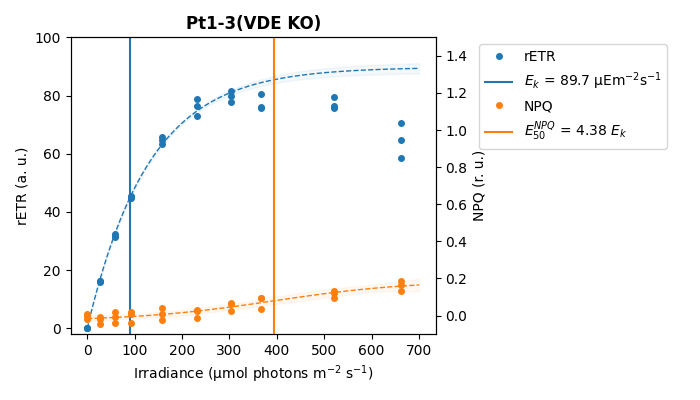

In [14]:
marker = 4
alpha = 1
Ek_offset = 2.5
Ek_amp = 1.5
NPQ_ax_lim = 1.5

# strains = ["Pt1-1", "Pt1-3", "Pt1-26", "Pt1-27", "Pt1-11", "Pt1-43"]
strains = ["Pt1-1", "Pt1-3"]


all_ETR = []
labels = []

for i, strain in enumerate(strains):
    fig, ax = plt.subplots(figsize=(7, 4))
    ax.set_ylim(-2, 100)
    ax2 = ax.twinx()
    names = exp_list[(exp_list["Strain"] == strain) & (exp_list["Final protocol"] == "yes")]["Name"].to_list()
    labels.append(strain + f"({exp_list[exp_list.Name == names[0]]['Label'].values[0]})")

    ETR = np.array([])
    NPQ = np.array([])
    light_ETR = np.array([])
    light_NPQ = np.array([])
    
    for name in names:
        path = f"{PSI_folder}/{name}/params.csv"
        params = pd.read_csv(path, index_col= False, sep=";")
        for column in columns_to_convert:
            params[column] = params[column].apply(fix_number_format)
            params[column] = params[column].apply(convert_to_list)
        aux_ETR = np.array([params.ETR[k][3] for k in params.index])
        aux_NPQ = np.array([params.NPQ[k][3] for k in params.index])
        ETR = np.concatenate((ETR, aux_ETR[:7]))
        NPQ = np.concatenate((NPQ, aux_NPQ))
        light_ETR = np.concatenate((light_ETR, params.Actinic[:7]))
        light_NPQ = np.concatenate((light_NPQ, params.Actinic))    

        ax.plot(params.Actinic, aux_ETR, 'o', markersize = marker, alpha = alpha, color = f"C{0}")
        ax2.plot(params.Actinic, aux_NPQ, 'o', markersize = marker, alpha = alpha, color = f"C{1}")
    
    ax.plot([], [], 'o', markersize = marker, alpha = alpha, color = f"C{0}", label = "rETR")
    popt, pcov, xfit, yfit = tools.Ek_fit(light_ETR, ETR, 0, 700, 100, p0=[100, 100])
    err = tools.my_err(xfit, popt, pcov, mf.Ek)
    ax.fill_between(xfit, yfit - 1.94 * err, yfit + 1.94 * err, alpha=0.05, color=f"C{0}")
    ax.plot(xfit, yfit, '--', color=f"C{0}", linewidth=1)
    Ek = popt[0]
    Ek_err = np.sqrt(np.diag(pcov))[0]
    ax.axvline(x=Ek, linewidth=1.5, color=f"C{0}", label = f"$E_k$ = {Ek:.1f} µEm$^{{-2}}$s$^{{-1}}$")
    
    ax.plot([], [], 'o', markersize = marker, alpha = alpha, color = f"C{1}", label = "NPQ")
    popt, pcov, xfit, yfit = tools.sigmoid_fit(light_NPQ, NPQ, 0, 700, 100, p0 =  [1, 0.02, 300, 0])
    err = tools.my_err(xfit, popt, pcov, mf.sigmoid)
    ax2.fill_between(xfit, yfit - 1.94*err, yfit + 1.94*err, alpha=0.05, color = f"C{1}")
    ax2.plot(xfit, yfit, '--', linewidth = 1, color = f"C{1}")
    ax2.axvline(x=popt[2], linewidth=1.5, color = f"C{1}")
    ax.plot([], [], color = f"C{1}", label = f"$E_{{50}}^{{NPQ}}$ = {popt[2]/Ek:.2f} $E_k$")
    ax2.set_ylim(-0.1, NPQ_ax_lim)
    
    ax.set_xlabel("Irradiance (µmol photons m$^{-2}$ s$^{-1}$)")
    ax.set_ylabel("rETR (a. u.)")
    ax2.set_ylabel("NPQ (r. u.)")
    ax.legend(bbox_to_anchor=(1.1, 1), loc='upper left')
    ax.set_title(f"{labels[i]}", fontweight = "bold")  


    fig.tight_layout()
        
        

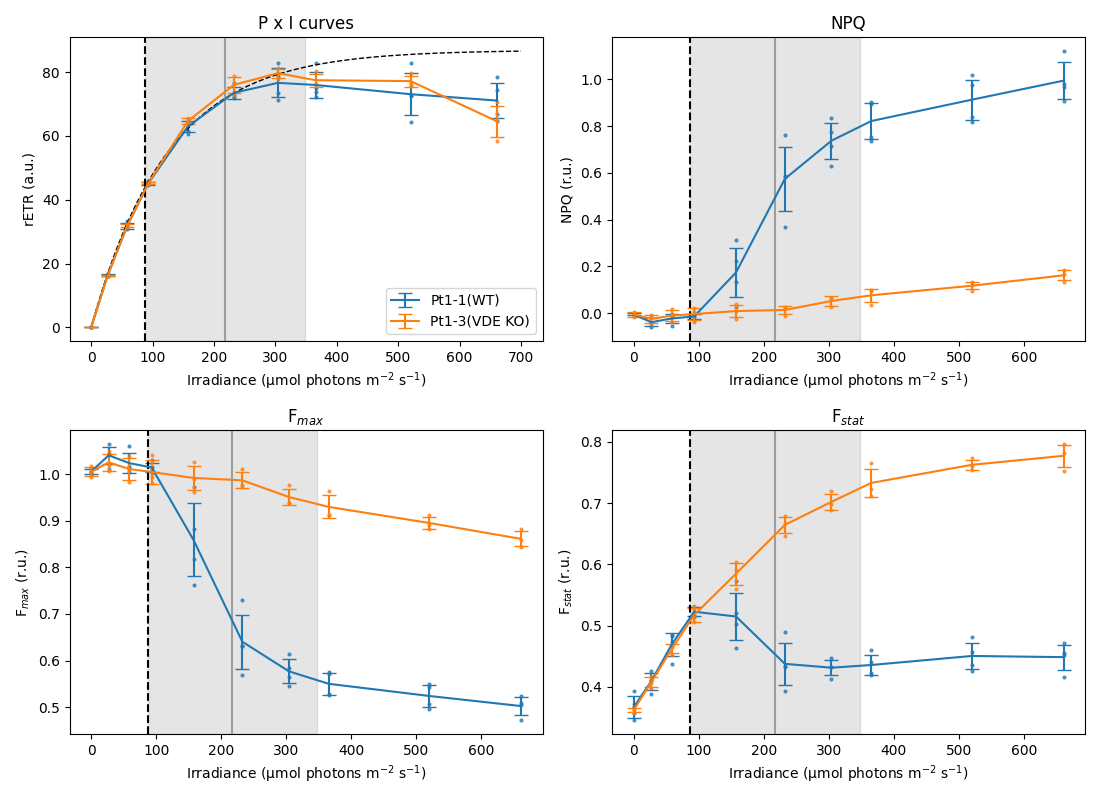

In [15]:
marker = 2
alpha = 0.7
Ek_offset = 2.5
Ek_amp = 1.5


# strains = ["Pt1-1", "Pt1-3", "Pt1-26", "Pt1-27", "Pt1-11", "Pt1-43"]
strains = ["Pt1-1", "Pt1-3"]
fig, ax = plt.subplots(2,2, figsize=(11,8))

all_ETR = []
labels = []

for i, strain in enumerate(strains):
    names = exp_list[(exp_list["Strain"] == strain) & (exp_list["Final protocol"] == "yes")]["Name"].to_list()
    labels.append(strain + f"({exp_list[exp_list.Name == names[0]]['Label'].values[0]})")

    ETR = []
    NPQ = []
    F_max = []
    F_stat = []
    
    for name in names:
        path = f"{PSI_folder}/{name}/params.csv"
        params = pd.read_csv(path, index_col= False, sep=";")
        for column in columns_to_convert:
            params[column] = params[column].apply(fix_number_format)
            params[column] = params[column].apply(convert_to_list)
        ETR.append([params.ETR[k][3] for k in params.index])
        NPQ.append([params.NPQ[k][3] for k in params.index])
        F_max.append([params.F_max[k][3] for k in params.index])
        F_stat.append([params.F_stat[k][3] for k in params.index])
        
        ax[0, 0].plot(params.Actinic, ETR[-1], 'o', markersize = marker, alpha = alpha, color = f"C{i}")
        ax[0, 1].plot(params.Actinic, NPQ[-1], 'o', markersize = marker, alpha = alpha, color = f"C{i}")
        ax[1, 0].plot(params.Actinic, F_max[-1], 'o', markersize = marker, alpha = alpha, color = f"C{i}")
        ax[1, 1].plot(params.Actinic, F_stat[-1], 'o', markersize = marker, alpha = alpha, color = f"C{i}")
    
    
    all_ETR.append(ETR)
    ETR = np.array(ETR)
    NPQ = np.array(NPQ)
    F_max = np.array(F_max)
    F_stat = np.array(F_stat)
    
    ax[0, 0].errorbar(params.Actinic, ETR.mean(axis=0), yerr = ETR.std(axis=0), fmt = '-', color = f"C{i}", label = labels[i], capsize = 5)
    ax[0, 1].errorbar(params.Actinic, NPQ.mean(axis=0), yerr = NPQ.std(axis=0), fmt = '-', color = f"C{i}", label = labels[i], capsize = 5)
    ax[1, 0].errorbar(params.Actinic, F_max.mean(axis=0), yerr = F_max.std(axis=0), fmt = '-', color = f"C{i}", label = labels[i], capsize = 5)
    ax[1, 1].errorbar(params.Actinic, F_stat.mean(axis=0), yerr = F_stat.std(axis=0), fmt = '-', color = f"C{i}", label = labels[i], capsize = 5)
    
all_data_array = np.array([replicate for condition in all_ETR for replicate in condition])
average = np.mean(all_data_array, axis = 0)
popt, pcov, xfit, yfit = tools.Ek_fit(params.Actinic[:7], average[:7], 0, 700, 100, p0=[100, 100])
Ek = popt[0]
ax[0,0].plot(xfit, yfit, '--', color="k", linewidth=1)

for ax_ in ax.flatten():
    ylim = ax_.get_ylim()
    ax_.axvline(Ek, color = "k", linestyle = "--")
    ax_.axvline(Ek*Ek_offset, color = "gray", linestyle = "-", alpha = 0.7)
    ax_.fill_betweenx(ylim, Ek*Ek_offset - Ek*Ek_amp, Ek*Ek_offset + Ek*Ek_amp, color = "k", alpha = 0.1)
    ax_.set_ylim(ylim)
    ax_.set_xlabel("Irradiance (µmol photons m$^{-2}$ s$^{-1}$)")

ax[0,0].set_ylabel("rETR (a.u.)")
ax[0,1].set_ylabel("NPQ (r.u.)")
ax[1,0].set_ylabel("F$_{max}$ (r.u.)")
ax[1,1].set_ylabel("F$_{stat}$ (r.u.)")
ax[0,0].legend()

ax[0,0].set_title("P x I curves")
ax[0,1].set_title("NPQ")
ax[1,0].set_title("F$_{max}$")
ax[1,1].set_title("F$_{stat}$")

fig.tight_layout()
        
        

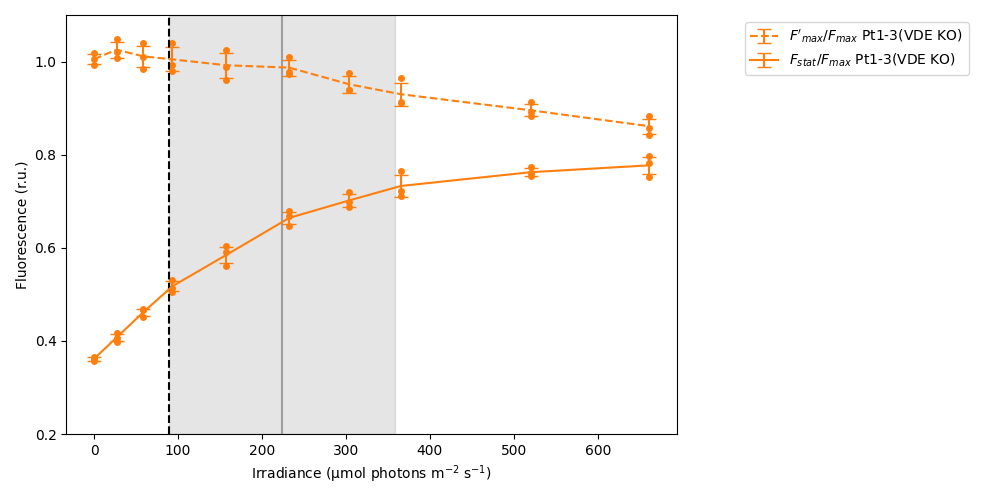

In [16]:
marker = 4
alpha = 1
Ek_offset = 2.5
Ek_amp = 1.5

# strains = ["Pt1-1", "Pt1-3", "Pt1-26", "Pt1-27", "Pt1-11", "Pt1-43"]
strains = ["Pt1-3"]


strain_to_color = {
    "Pt1-1": "C0",
    "Pt1-3": "C1",
    "Pt1-26": "C2",
    "Pt1-27": "C3",
    "Pt1-11": "C4",
    "Pt1-43": "C5",
}

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_ylim(0.2, 1.1)

all_ETR = []
labels = []

for i, strain in enumerate(strains):
    names = exp_list[(exp_list["Strain"] == strain) & (exp_list["Final protocol"] == "yes")]["Name"].to_list()
    labels.append(strain + f"({exp_list[exp_list.Name == names[0]]['Label'].values[0]})")

    ETR = []
    F_max = []
    F_stat = []
    
    for name in names:
        path = f"{PSI_folder}/{name}/params.csv"
        params = pd.read_csv(path, index_col= False, sep=";")
        for column in columns_to_convert:
            params[column] = params[column].apply(fix_number_format)
            params[column] = params[column].apply(convert_to_list)
        ETR.append([params.ETR[k][3] for k in params.index])
        F_max.append([params.F_max[k][3] for k in params.index])
        F_stat.append([params.F_stat[k][3] for k in params.index])
        
        ax.plot(params.Actinic, F_max[-1], 'o', markersize = marker, alpha = alpha, color = strain_to_color[strain])
        ax.plot(params.Actinic, F_stat[-1], 'o', markersize = marker, alpha = alpha, color = strain_to_color[strain])
    
    
    all_ETR.append(ETR)
    ETR = np.array(ETR)
    F_max = np.array(F_max)
    F_stat = np.array(F_stat)
    
    ax.errorbar(params.Actinic, F_max.mean(axis=0), yerr = F_max.std(axis=0), fmt = '--', color = strain_to_color[strain], label = "$F'_{max}$/$F_{max}$ " + labels[i], capsize = 5)
    ax.errorbar(params.Actinic, F_stat.mean(axis=0), yerr = F_stat.std(axis=0), fmt = '-', color = strain_to_color[strain], label = "$F_{stat}$/$F_{max}$ " + labels[i], capsize = 5)
    
all_data_array = np.array([replicate for condition in all_ETR for replicate in condition])
average = np.mean(all_data_array, axis = 0)
popt, pcov, xfit, yfit = tools.Ek_fit(params.Actinic[:7], average[:7], 0, 700, 100, p0=[100, 100])
Ek = popt[0]

ylim = ax.get_ylim()
ax.axvline(Ek, color = "k", linestyle = "--")
ax.axvline(Ek*Ek_offset, color = "gray", linestyle = "-", alpha = 0.7)
ax.fill_betweenx(ylim, Ek*Ek_offset - Ek*Ek_amp, Ek*Ek_offset + Ek*Ek_amp, color = "k", alpha = 0.1)
ax.set_ylim(ylim)
ax.set_xlabel("Irradiance (µmol photons m$^{-2}$ s$^{-1}$)")

ax.set_ylabel("Fluorescence (r.u.)")

ax.legend(bbox_to_anchor=(1.1, 1), loc='upper left')

fig.tight_layout()

AttributeError: 'numpy.ndarray' object has no attribute 'loglog'

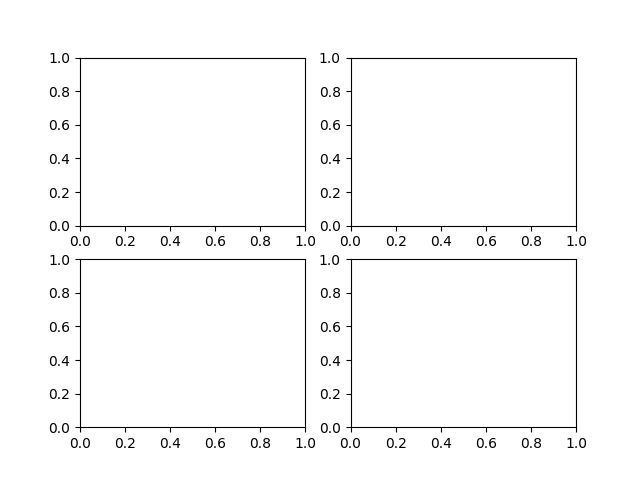

In [17]:
marker = 2
alpha = 0.7

strains = ["Pt1-1", "Pt1-3", "Pt1-26", "Pt1-27"]
fig, ax = plt.subplots(2,2)

for i, strain in enumerate(strains):
    names = exp_list[(exp_list["Strain"] == strain) & (exp_list["Final protocol"] == "yes")]["Name"].to_list()

    ETR = []
    NPQ = []
    F_max = []
    F_stat = []
    
    for name in names:
        path = f"{PSI_folder}/{name}/params.csv"
        params = pd.read_csv(path, index_col= False, sep=";")
        for column in columns_to_convert:
            params[column] = params[column].apply(fix_number_format)
            params[column] = params[column].apply(convert_to_list)
        
        
        ax[0].loglog(harmonics['f_input'], harmonics['A_0']/(norm_Fmax * A_input), 'o', color = f"C{i}", markersize = marker, alpha = alpha)
        phase = harmonics['P_0'] - 180 - ref_phase
        ax[1].semilogx(harmonics['f_input'], phase, 'o', color = f"C{i}", markersize = marker, alpha = alpha)
        amplitudes.append(harmonics['A_0']/(norm_Fmax * A_input))
        phases.append(phase)
    
    label = f"{strain} ({exp_list.iloc[i_list]['Label']})"
    amplitudes = np.array(amplitudes)
    phases = np.array(phases)
    mean_amplitude = np.mean(amplitudes, axis = 0)
    std_amplitude = np.std(amplitudes, axis = 0)
    mean_phase = np.mean(phases, axis = 0)
    std_phase = np.std(phases, axis = 0)
    ax[0].errorbar(harmonics['f_input'], mean_amplitude, yerr = std_amplitude, color = f"C{i}", label = label, capsize = 4)
    ax[1].errorbar(harmonics['f_input'], mean_phase, yerr = std_phase, color = f"C{i}", label = label, capsize = 4)
    # ax[0].fill_between(harmonics['f_input'], mean_amplitude - std_amplitude, mean_amplitude + std_amplitude, color = f"C{i}", alpha = 0.1)
    # ax[1].fill_between(harmonics['f_input'], mean_phase - std_phase, mean_phase + std_phase, color = f"C{i}", alpha = 0.1)
    
ax[0].set_xlabel("Frequency (Hz)")
ax[1].set_xlabel("Frequency (Hz)")

ax[0].grid(which ="both", alpha = 0.3)
ax[1].grid(which = "both", alpha = 0.3)

ax[1].set_ylim(-30, 30)
ax[1].set_yticks(np.arange(-30, 30 + 15, 15))

ax[0].set_ylabel("Amplitude (r.u.)")
ax[1].set_ylabel("Phase (degrees)")

ax[0].legend()

fig.tight_layout()
    

NameError: name 'replicates' is not defined

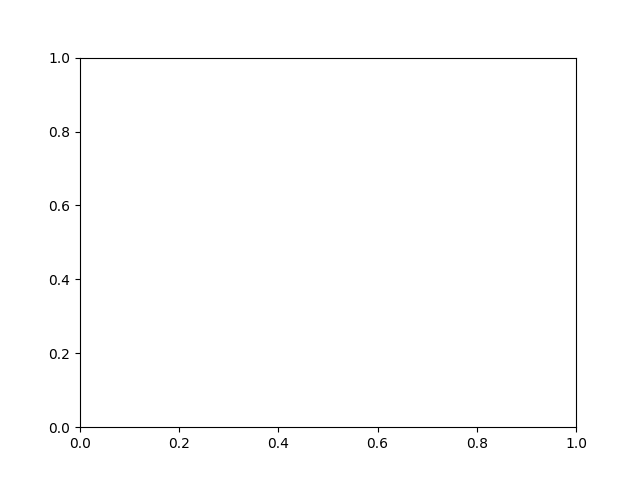

In [18]:
Ek_offset = 2.5
Ek_amp = 1.5


fig, ax = plt.subplots()
ETR = []
for i, strain in enumerate(strains):
    ETR.append([])
    for j, replicate in enumerate(replicates[i]):
        ETR[i].append([ETR_aux[-1] for ETR_aux in results[i][j]['ETR']])
        ax.plot(results[i][j]['Actinic'], ETR[i][-1], 'o', color = f"C{i}", markersize = 3)
    ETR[i] = np.array(ETR[i])
    ax.errorbar(results[i][j]['Actinic'], np.mean(ETR[i], axis = 0), yerr = np.std(ETR[i], axis = 0), fmt = '-', color = f"C{i}", label = f"{strain} mean, n = {len(replicates[i])}", capsize=5)

all_data_array = np.array([replicate for condition in ETR for replicate in condition])
average = np.mean(all_data_array, axis = 0)
popt, pcov, xfit, yfit = tools.Ek_fit(results[i][j]['Actinic'][:7], average[:7], 0, 700, 100, p0=[100, 100])
ax.plot(xfit, yfit, '--', color="k", linewidth=1)
ylim = ax.get_ylim()
Ek = popt[0]
ax.axvline(Ek, color = "k", linestyle = "--")
ax.axvline(Ek*Ek_offset, color = "gray", linestyle = "-", alpha = 0.5)
ax.fill_betweenx(ylim, Ek*Ek_offset - Ek*Ek_amp, Ek*Ek_offset + Ek*Ek_amp, color = "k", alpha = 0.1)
ax.set_ylim(ylim)


ax.set_xlabel("Light intensity (µmol photons m$^{-2}$ s$^{-1}$)")
ax.set_ylabel("rETR (a.u.)")
ax.legend()

NameError: name 'replicates' is not defined

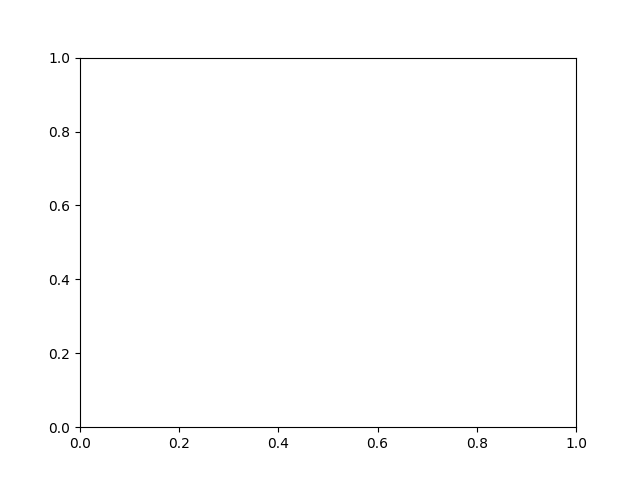

In [19]:
fig, ax = plt.subplots()
NPQ = []
for i, strain in enumerate(strains):
    NPQ.append([])
    for j, replicate in enumerate(replicates[i]):
        NPQ[i].append([NPQ_aux[-1] for NPQ_aux in results[i][j]['NPQ']])
        ax.plot(results[i][j]['Actinic'], NPQ[i][-1], 'o', color = f"C{i}", markersize = 4)
    NPQ[i] = np.array(NPQ[i])
    ax.errorbar(results[i][j]['Actinic'], np.mean(NPQ[i], axis = 0), yerr = np.std(NPQ[i], axis = 0), fmt = '-', color = f"C{i}", label = f"{strain} mean, n = {len(replicates[i])}", capsize=5)
ylim = ax.get_ylim()
ax.axvline(Ek, color = "k", linestyle = "--")
ax.axvline(Ek*Ek_offset, color = "gray", linestyle = "-", alpha = 0.5)
ax.fill_betweenx(ylim, Ek*Ek_offset - Ek*Ek_amp, Ek*Ek_offset + Ek*Ek_amp, color = "k", alpha = 0.1)
ax.set_ylim(ylim)

ax.set_xlabel("Light intensity (µmol photons m$^{-2}$ s$^{-1}$)")
ax.set_ylabel("NPQ (a.u.)")
ax.legend()

NameError: name 'replicates' is not defined

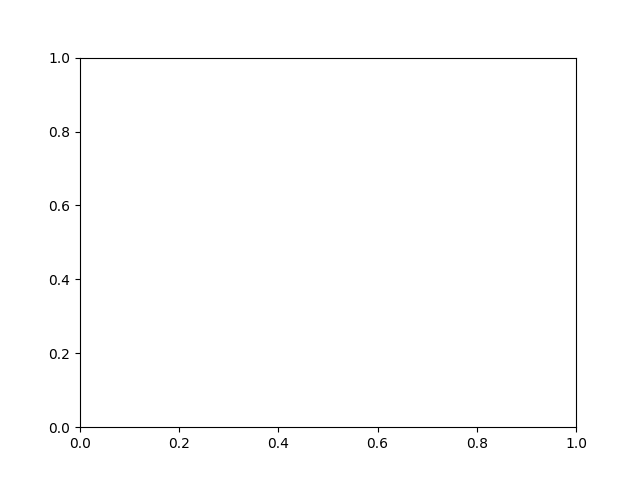

In [20]:
fig, ax = plt.subplots()
F_stat = []
F_max = []
for i, strain in enumerate(strains):
    F_stat.append([])
    F_max.append([])
    for j, replicate in enumerate(replicates[i]):
        F_stat[i].append([F_stat_aux[-1] for F_stat_aux in results[i][j]['F_stat']])
        F_max[i].append([F_max_aux[-1] for F_max_aux in results[i][j]['F_max']])
        # ax.plot(results[i][j]['Actinic'], F_stat[i][-1], 'o', color = f"C{i}", markersize = 3, alpha = 0.2)
        # ax.plot(results[i][j]['Actinic'], F_max[i][-1], 'o', color = f"C{i}", markersize = 3, alpha = 0.2)
    F_stat[i] = np.array(F_stat[i])
    F_max[i] = np.array(F_max[i])
    ax.errorbar(results[i][j]['Actinic'], np.mean(F_stat[i], axis = 0), yerr = np.std(F_stat[i], axis = 0), fmt = '-', color = f"C{i}", label = f"{strain} mean, n = {len(replicates[i])}", capsize=5)
    ax.errorbar(results[i][j]['Actinic'], np.mean(F_max[i], axis = 0), yerr = np.std(F_max[i], axis = 0), fmt = '-', color = f"C{i}", capsize=5)

ylim = ax.get_ylim()
ax.axvline(Ek, color = "k", linestyle = "--")
ax.axvline(Ek*Ek_offset, color = "gray", linestyle = "-", alpha = 0.5)
ax.fill_betweenx(ylim, Ek*Ek_offset - Ek*Ek_amp, Ek*Ek_offset + Ek*Ek_amp, color = "k", alpha = 0.1)
ax.set_ylim(ylim)

ax.set_xlabel("Light intensity (µmol photons m$^{-2}$ s$^{-1}$)")
ax.set_ylabel("Fluorescence (r.u.)")
ax.legend()

(-0.1, 0.4)

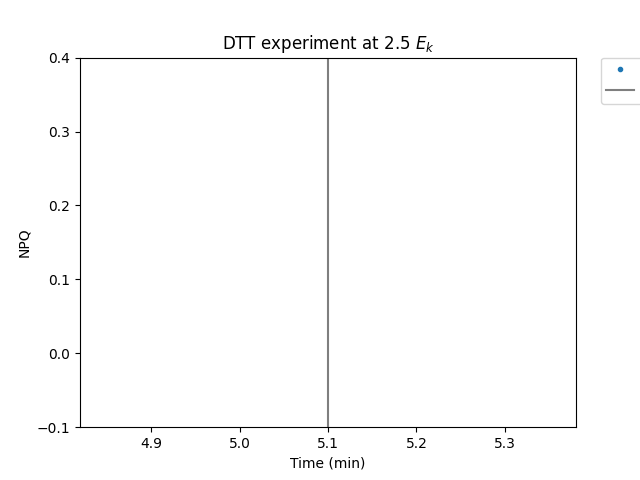

In [21]:
marker = 3
alpha = 0.7

strains = [1, 3, 26, 27]
fmts = ["-o", "--o", ":o"]
labels = []

fig, ax = plt.subplots()
for i, strain in enumerate(strains):
    names = exp_list[exp_list["Strain"] == strain]["Name"].to_list()
    for j, name in enumerate(names):
        i_list = exp_list[exp_list["Name"] == name].index.values[0]
        path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/params.csv"
        params = pd.read_csv(path, index_col= False, sep=";")
        time = (params["Time"].to_numpy() - params["Time"].to_numpy()[0])/60
        NPQ = params["NPQ"].to_numpy()
        ax.plot(time, NPQ, fmts[j], color = f"C{i}", markersize = marker)

ax.plot([], [], "o", color = "C0", markersize = marker, label = "WT")
ax.axvline(x= 5.1, color = 'k', linestyle = '-', label = 'DTT added', alpha = 0.5) 
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xlabel("Time (min)")
ax.set_ylabel("NPQ")
ax.set_title("DTT experiment at 2.5 $E_k$")
ax.set_ylim(-0.1, 0.4)


(-0.1, 0.4)

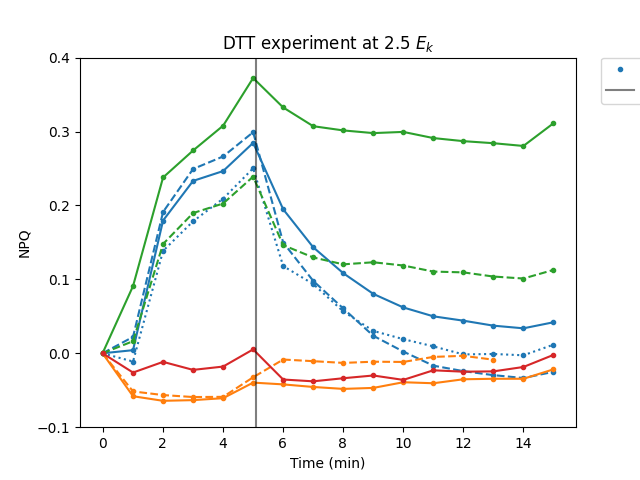

In [ ]:
marker = 3
alpha = 0.7

strains = [1, 3, 26, 27]
fmts = ["-o", "--o", ":o"]
labels = []

fig, ax = plt.subplots()
for i, strain in enumerate(strains):
    names = exp_list[exp_list["Strain"] == strain]["Name"].to_list()
    for j, name in enumerate(names):
        i_list = exp_list[exp_list["Name"] == name].index.values[0]
        path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/params.csv"
        params = pd.read_csv(path, index_col= False, sep=";")
        time = (params["Time"].to_numpy() - params["Time"].to_numpy()[0])/60
        NPQ = params["NPQ"].to_numpy()
        ax.plot(time, NPQ, fmts[j], color = f"C{i}", markersize = marker)

ax.plot([], [], "o", color = "C0", markersize = marker, label = "WT")
ax.axvline(x= 5.1, color = 'k', linestyle = '-', label = 'DTT added', alpha = 0.5) 
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xlabel("Time (min)")
ax.set_ylabel("NPQ")
ax.set_title("DTT experiment at 2.5 $E_k$")
ax.set_ylim(-0.1, 0.4)


(-0.1, 0.4)

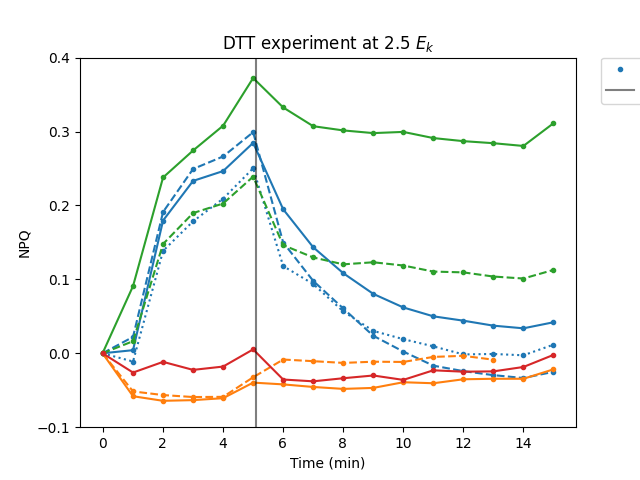

In [ ]:
marker = 3
alpha = 0.7

strains = [1, 3, 26, 27]
fmts = ["-o", "--o", ":o"]
labels = []

fig, ax = plt.subplots()
for i, strain in enumerate(strains):
    names = exp_list[exp_list["Strain"] == strain]["Name"].to_list()
    for j, name in enumerate(names):
        i_list = exp_list[exp_list["Name"] == name].index.values[0]
        path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/params.csv"
        params = pd.read_csv(path, index_col= False, sep=";")
        time = (params["Time"].to_numpy() - params["Time"].to_numpy()[0])/60
        NPQ = params["NPQ"].to_numpy()
        ax.plot(time, NPQ, fmts[j], color = f"C{i}", markersize = marker)

ax.plot([], [], "o", color = "C0", markersize = marker, label = "WT")
ax.axvline(x= 5.1, color = 'k', linestyle = '-', label = 'DTT added', alpha = 0.5) 
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xlabel("Time (min)")
ax.set_ylabel("NPQ")
ax.set_title("DTT experiment at 2.5 $E_k$")
ax.set_ylim(-0.1, 0.4)


(-0.1, 0.4)

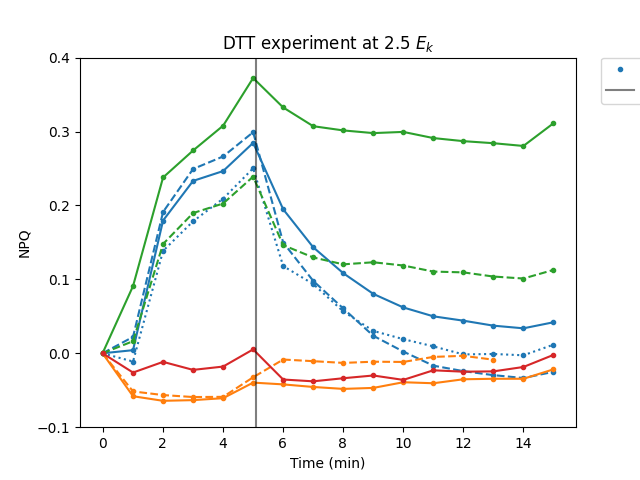

In [ ]:
marker = 3
alpha = 0.7

strains = [1, 3, 26, 27]
fmts = ["-o", "--o", ":o"]
labels = []

fig, ax = plt.subplots()
for i, strain in enumerate(strains):
    names = exp_list[exp_list["Strain"] == strain]["Name"].to_list()
    for j, name in enumerate(names):
        i_list = exp_list[exp_list["Name"] == name].index.values[0]
        path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/params.csv"
        params = pd.read_csv(path, index_col= False, sep=";")
        time = (params["Time"].to_numpy() - params["Time"].to_numpy()[0])/60
        NPQ = params["NPQ"].to_numpy()
        ax.plot(time, NPQ, fmts[j], color = f"C{i}", markersize = marker)

ax.plot([], [], "o", color = "C0", markersize = marker, label = "WT")
ax.axvline(x= 5.1, color = 'k', linestyle = '-', label = 'DTT added', alpha = 0.5) 
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xlabel("Time (min)")
ax.set_ylabel("NPQ")
ax.set_title("DTT experiment at 2.5 $E_k$")
ax.set_ylim(-0.1, 0.4)


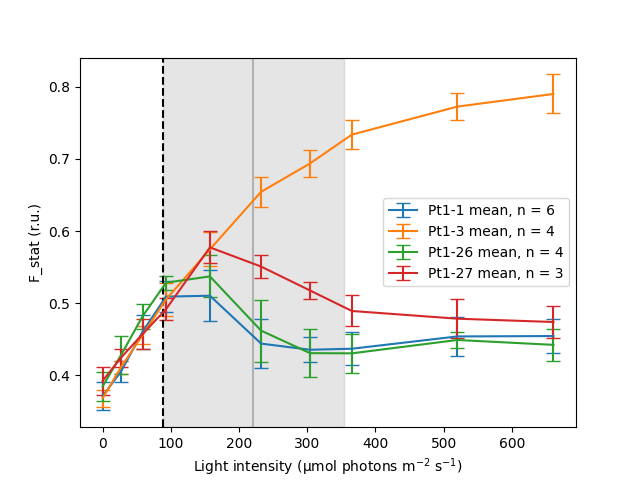

In [168]:


fig, ax = plt.subplots()
F_stat = []
for i, strain in enumerate(strains):
    F_stat.append([])
    for j, replicate in enumerate(replicates[i]):
        F_stat[i].append([F_stat_aux[-1] for F_stat_aux in results[i][j]['F_stat']])
        # ax.plot(results[i][j]['Actinic'], F_stat[i][-1], 'o', color = f"C{i}", markersize = 3, alpha = 0.2)
    F_stat[i] = np.array(F_stat[i])
    ax.errorbar(results[i][j]['Actinic'], np.mean(F_stat[i], axis = 0), yerr = np.std(F_stat[i], axis = 0), fmt = '-', color = f"C{i}", label = f"{strain} mean, n = {len(replicates[i])}", capsize=5)

ylim = ax.get_ylim()
ax.axvline(Ek, color = "k", linestyle = "--")
ax.axvline(Ek*Ek_offset, color = "gray", linestyle = "-", alpha = 0.5)
ax.fill_betweenx(ylim, Ek*Ek_offset - Ek*Ek_amp, Ek*Ek_offset + Ek*Ek_amp, color = "k", alpha = 0.1)
ax.set_ylim(ylim)

ax.set_xlabel("Light intensity (µmol photons m$^{-2}$ s$^{-1}$)")
ax.set_ylabel("F_stat (r.u.)")
ax.legend()